In [ ]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.utils import to_categorical
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re

In [ ]:
filename = "/content/pg11339.txt"
with open(filename, encoding='utf-8-sig') as f:
  text = f.read()
print('Corpus length:', len(text))

Corpus length: 235312


In [ ]:
seq_length = 20
start_story = '| ' * seq_length
def clean_text(text):
  text = start_story + text
  text = text.replace('\n\n\n\n\n', start_story)
  text = text.lower()
  text = re.sub(r"\s+", " ", text)
  text = re.sub('([!"#$%&()*+,-./:;<=>?@[\]^_`{|}~])', r' \1 ', text)
  text = re.sub('\s{2,}', ' ', text)
  return text
text=clean_text(text)

In [ ]:
token=Tokenizer()
token.fit_on_texts([text])
total_words=len(token.word_index)+1
print(total_words)

4819


In [ ]:
token_list = token.texts_to_sequences([text])[0]
print(token_list)

[1, 73, 159, 373, 5, 1105, 312, 3, 313, 922, 49, 373, 29, 12, 1, 160, 5, 923, 780, 8, 1, 314, 249, 2, 194, 74, 1106, 5, 1, 438, 18, 44, 671, 2, 16, 547, 44, 1798, 1799, 9, 110, 406, 13, 176, 13, 84, 52, 1800, 160, 13, 195, 1, 213, 5, 1, 73, 159, 282, 1368, 16, 49, 373, 52, 924, 18, 548, 159, 549, 40, 9, 43, 32, 672, 8, 1, 314, 249, 9, 64, 42, 4, 1107, 1, 439, 5, 1, 374, 111, 9, 43, 672, 91, 592, 49, 373, 2552, 1105, 312, 3, 313, 922, 2553, 2554, 2555, 1369, 1370, 1371, 2556, 1108, 1801, 2557, 1802, 440, 1803, 1804, 1805, 1372, 2558, 118, 2559, 373, 2560, 194, 2561, 1806, 2562, 2563, 2564, 1807, 2565, 1808, 2566, 313, 2567, 2568, 2569, 1809, 2570, 593, 22, 2571, 2572, 2573, 2574, 2, 1, 924, 925, 2575, 1373, 673, 5, 1, 73, 159, 373, 1105, 312, 3, 313, 922, 781, 312, 3, 313, 922, 22, 1802, 440, 1803, 1804, 16, 54, 1810, 22, 1369, 1370, 1371, 2, 1374, 22, 1108, 1801, 1809, 1811, 1810, 594, 2576, 54, 2577, 32, 1812, 8, 375, 1813, 7, 926, 29, 30, 1, 95, 1109, 219, 6, 127, 1109, 13, 1, 2578, 

In [ ]:
token_dec = token.sequences_to_texts([token_list])
print(token_dec)

["the project gutenberg ebook of aesop's fables a new translation this ebook is for the use of anyone anywhere in the united states and most other parts of the world at no cost and with almost no restrictions whatsoever you may copy it give it away or re use it under the terms of the project gutenberg license included with this ebook or online at www gutenberg org if you are not located in the united states you will have to check the laws of the country where you are located before using this ebook title aesop's fables a new translation author aesop commentator g k chesterton illustrator arthur rackham translator v s vernon jones release date february 1 2004 ebook 11339 most recently updated october 28 2024 language english original publication new york avenel books 1912 credits produced by suzanne shell greg chapman and the online distributed proofreading team start of the project gutenberg ebook aesop's fables a new translation æsop's fables a new translation by v s vernon jones with

In [ ]:
def generate_sequences(token_list,step):
  x=[]
  y=[]

  for i in range(0,len(token_list)-seq_length, step):
    x.append(token_list[i:i+seq_length])
    y.append(token_list[i+seq_length])

  y = to_categorical(y, num_classes=total_words)
  num_seq = len(x)
  num_label = len(y)
  print('Number of sequences:', num_seq, "\n")
  print('Number of labels:', num_label)
  return x, y, num_seq

step = 1
seq_length = 20
x, y, num_seq = generate_sequences(token_list, step)
x = np.array(x)
y = np.array(y)

Number of sequences: 44748 

Number of labels: 44748


In [ ]:
x.shape,y.shape

((44748, 20), (44748, 4819))

In [ ]:
type(x)

numpy.ndarray

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)



# Convert x_train and x_test back to lists of sequences before padding
x_train_list = [[int(num) for num in sublist] for sublist in x_train]
x_test_list = [[int(num) for num in sublist] for sublist in x_test]


x_train = pad_sequences(x_train_list, maxlen=200) # Now use the list of sequences
x_test = pad_sequences(x_test_list, maxlen=200)  # Now use the list of sequences

In [ ]:
type(x_train),x_train.shape,x_test.shape

(numpy.ndarray, (35798, 200), (8950, 200))

In [ ]:
n_units = 256
embedding_size = 100

model=Sequential()
# model.add(Bidirectional(LSTM(n_units, return_sequences=True)))
model.add(Embedding(total_words,embedding_size))  #input_dim=total_word, output_dim=embeding_size
model.add(LSTM(n_units))
model.add(Dropout(0.2))
model.add(Dense(total_words, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
hist=model.fit(x,y,epochs=100, shuffle=True, batch_size=32)

Epoch 1/100
1399/1399 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.0848 - loss: 6.4875
Epoch 2/100
1399/1399 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.1164 - loss: 5.6785
Epoch 3/100
1399/1399 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.1468 - loss: 5.2118
Epoch 4/100
1399/1399 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.1740 - loss: 4.8213
Epoch 5/100
1399/1399 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - accuracy: 0.1939 - loss: 4.4487
Epoch 6/100
1399/1399 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - accuracy: 0.2193 - loss: 4.1037
Epoch 7/100
1399/1399 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.2461 - loss: 3.7715
Epoch 8/100
1399/1399 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.2859 - loss: 3.4309
Epoch 9/100
1399/1399 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.3310 - loss: 3.1188
Epoch 10/100
1399/1399 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.3810 - loss: 2.8051
Epoch 11/100
1399/1399 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.4318 - loss: 2.5356
Epoch 12

Text(0.5, 0, 'epoch')

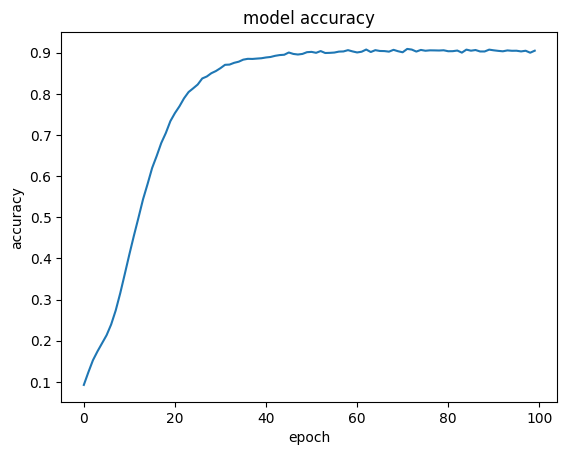

In [ ]:
plt.plot(hist.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

# **Auto Complete**

In [ ]:
import numpy as np

def generate_text(model, tokenizer, seed_text, seq_length, num_words_to_generate):
    """
    Generate text using a trained LSTM model.

    Parameters:
        model: Trained LSTM model.
        tokenizer: Tokenizer used for text preprocessing.
        seed_text: Initial text to start the generation.
        seq_length: Length of input sequences used during training.
        num_words_to_generate: Number of words to generate.

    Returns:
        Generated text as a string.
    """
    generated_text = seed_text

    # Tokenize the seed text
    for _ in range(num_words_to_generate):
        tokenized_input = tokenizer.texts_to_sequences([generated_text])[0]
        tokenized_input = tokenized_input[-seq_length:]  # Ensure length matches the training input

        # Pad input sequence to match the training input size
        padded_input = np.pad(
            tokenized_input,
            (max(0, seq_length - len(tokenized_input)), 0),
            mode="constant"
        )
        padded_input = np.array([padded_input])

        # Predict the next word
        predictions = model.predict(padded_input, verbose=0)
        next_word_id = np.argmax(predictions)

        # Convert ID to word
        next_word = tokenizer.index_word[next_word_id]
        generated_text += ' ' + next_word

    return generated_text


In [ ]:
# Example inputs
seed_text = "Once upon a time"
seq_length = 20  # Same as the sequence length during training
num_words_to_generate = 50  # Number of words to generate

# Generate text
output_text = generate_text(model, token, seed_text, seq_length, num_words_to_generate)
print("Generated Text:\n", output_text)


Generated Text:
 Once upon a time the gnat and the lion a man once caught a weasel and was carrying a field which he had lately sown with corn in order to catch the cranes which would be seen the dog came to the wood and asked him what he was and said to have you


# **Question & Answer**